# Computação Gráfica e Processamento de Imagens - ECOM039 - M

## Create Images

Curso: **Engenharia de Computação**

**Prof. Dr. Tiago Vieira**

Aluno: 

**John Davi Dutra Canuto Pires - 18112206**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

#### (1) Create the image of a paraboloid with one axis scaled (like an oval paraboloid).

**z = x^2 + y^2**

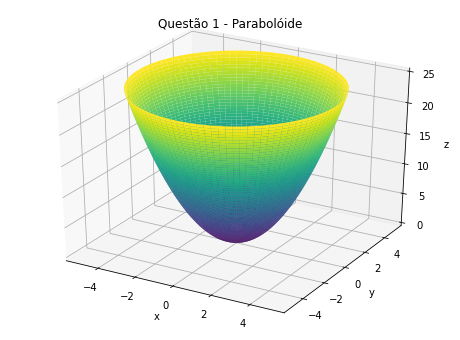

In [ ]:
def f(x, y):
    return x ** 2 + y ** 2

radius = 5
r  = np.linspace(0, radius, 100)
theta = np.linspace(0, 2 * np.pi, 100)
R, THETA = np.meshgrid(r, theta)

X, Y = R * np.cos(THETA), R * np.sin(THETA)
Z = f(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_title('Questão 1 - Parabolóide')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.show()

#### (2) Create the image of a rotated sin(x) using rotation of coordinates.

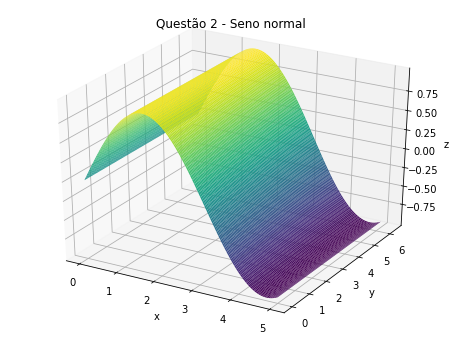

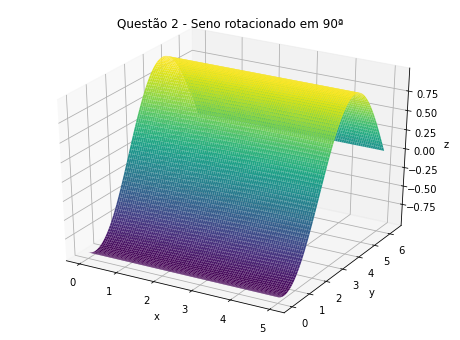

In [ ]:
x = y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(r, theta)
Z = np.sin(X)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Questão 2 - Seno normal')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.show()

Z = np.rot90(np.sin(X), k=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Questão 2 - Seno rotacionado em 90ª')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.show()

#### (3) Create the image of a gaussian in 2D.

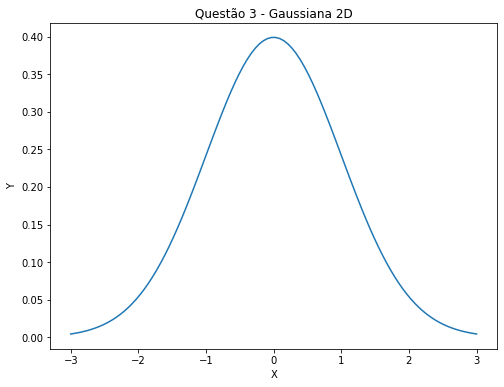

In [ ]:
import scipy.stats as stats

fig = plt.figure(figsize=(8, 6))
mu = 0
variance = 1
sigma = np.sqrt(variance)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Questão 3 - Gaussiana 2D")
X = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(X, mu, sigma))
plt.show()

#### (4) Create a function that generates the image of a Gaussian optionally rotated by an angle \theta and with mx, my, sx, sy as input arguments.

In [ ]:
def plot_img(X, Y, Z, title):
  fig = plt.figure(figsize=(8, 6))
  ax = plt.axes(projection='3d')
  ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('z')
  ax.set_title(title)
  ax.plot_surface(X, Y, Z, cmap="viridis", linewidth=0, antialiased=False, alpha=0.5)
  plt.show()

def GaussianRotation(mx, my, sx, sy, theta):
  x = np.linspace(mx - 5*sx, mx + 5*sx, 50)
  y = np.linspace(my - 5*sy, my + 5*sy, 50)

  X, Y = np.meshgrid(x, y)
  xy = np.sqrt((X-mx/5)**2 + (Y-my)**2)
  Z = ((1. / (sx*np.sqrt(2 * np.pi))) * np.exp((-1*(xy)**2)/(2*sy**2)))

  plot_img(X, Y, Z, "Questão 4 - Gaussiana 3D normal")

  transpose = np.transpose(np.array([X,Y,Z]), (2,1,0))
  rotation_matrix = [
      [np.cos(theta), np.sin(theta), 0],
      [-np.sin(theta), np.cos(theta), 0],
      [0,0,1]
  ]
  X,Y,Z = np.transpose(np.dot(transpose, rotation_matrix), (2,1,0))

  plot_img(X, Y, Z, "Questão 4 - Gaussiana 3D rotacionada $\pi$/3")

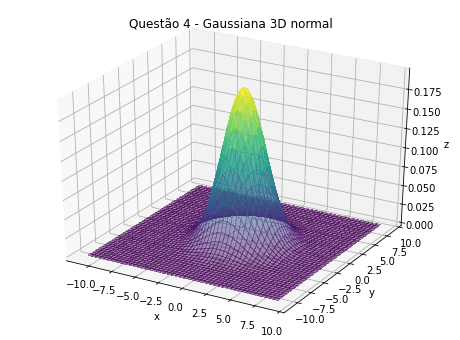

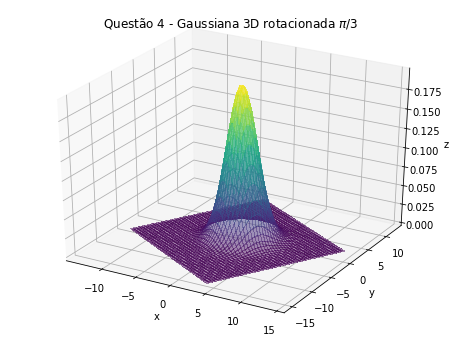

In [ ]:
mx = -1
my = -1
sx = np.sqrt(4)
sy = np.sqrt(4)
theta = np.pi/3
GaussianRotation(mx, my, sx, sy, theta)